<a href="https://colab.research.google.com/github/abhiwavhal/BIKE-SHARING-DEMAND-PREDICTION/blob/main/Bike_Shearing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Seoul Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

#### **The Almabetter team assigned me a project with the objective of gaining insights into bike sharing systems.These systems involve automated processes for membership acquisition, bike rental, and bike return across a city. Through these systems, individuals can rent a bike from one location and return it to another.The dataset provided, known as "Seoul bike data," includes a column named "Rented bike count," which serves as our target variable, while the other columns are considered independent variables. Our goal is to utilize various machine learning techniques to predict the hourly count of rented bikes.**
#### **Upon reviewing the dataset, it appears that some preprocessing is necessary before we can use the data. However, it's worth noting that there are no missing or null values in the dataset.In the next step, we need to perform Exploratory Data Analysis (EDA). During this process, I noticed that the "hour" column, although initially considered numerical, should be treated as a categorical feature. This adjustment is crucial because, when left as numerical, it didn't yield accurate results in subsequent analyses.**
#### **Additionally, we need to address multicollinearity in the dataset. Specifically, the columns "temperature" and "dew point temperature" exhibit a high degree of correlation. To mitigate this issue and avoid affecting the model's outcome, we should consider removing one of these columns.**
#### **The dataset has been divided into a training set and a testing set to enhance model accuracy. I have established evaluation metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Scaled Error (MASE), R-Squared, Adjusted R-Squared, Best-params, and Best-score, to assess the performance of different models.**
#### **Although Linear Regression was initially employed as a baseline model, it was recognized that this approach may not be suitable. As a result, other models were fitted as reference points to gauge their performance.**
#### **To mitigate overfitting and achieve optimal outcomes, regularization techniques like Lasso and Ridge regression were employed. Multiple Linear Regression was also applied, yielding improved results.**





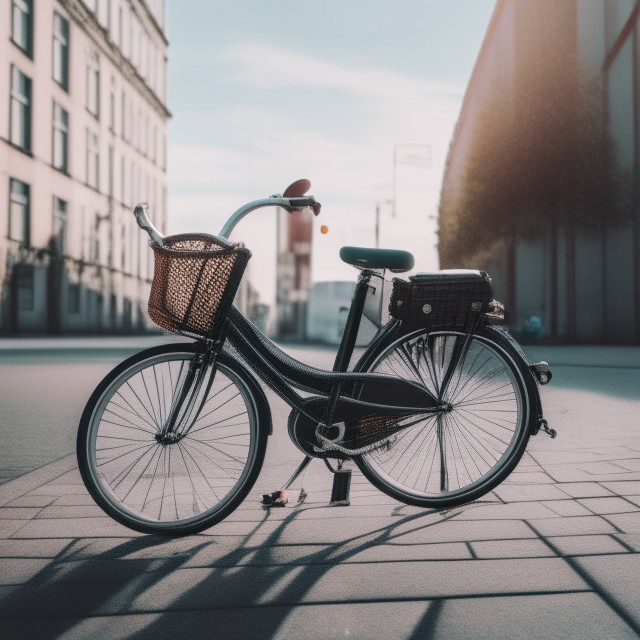

# **GitHub Link -**

https://github.com/abhiwavhal/BIKE_SHARING_DEMAND_PREDICTION/blob/main/Bike_Shearing_Demand_Prediction.ipynb

# **Problem Statement**


#### **In many urban cities, rental bikes have been introduced to enhance mobility comfort, and ensuring their availability and accessibility is crucial to reduce waiting times.**
#### **The challenge lies in maintaining a stable supply of rental bikes, making accurate hourly predictions for bike demand essential.**
#### **Seoul, South Korea's bike-sharing program faces low utilization rates and resource inefficiencies.my project's goal is to develop a precise predictive model that forecasts bike rental demand by leveraging historical usage patterns, weather data, and relevant factors.**
#### **By doing so, we aim to help optimize the bike-sharing program, enhancing user satisfaction while reducing operational costs.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
# Importing required Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# from xgboost import XGBRegressor
# import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

### Dataset Loading

In [5]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Load Dataset
seol_bike_df=pd.read_csv('/content/drive/MyDrive/Almas Better/Regression Capstone Project/SeoulBikeData.csv',encoding='latin')

### Dataset First View

In [9]:
# Dataset First Look
# Checking the top 5 rows od the dataset
seol_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
# Checking the bottom 5 rows of the dataset
seol_bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [11]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",seol_bike_df.shape[0])
print("Number of columns are: ",seol_bike_df.shape[1])

Number of rows are:  8760
Number of columns are:  14


In [12]:
# Checking all the columns name
seol_bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### For the information above, we can see that there are 8760 rows and 14 columns.

### Dataset Information

In [13]:
# Dataset Info
seol_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [14]:
# Checking duplicated rows count
duplicates_from_dataset=seol_bike_df.duplicated().sum()
print(f'There are {duplicates_from_dataset} duplicate values in dataset.')

There are 0 duplicate values in dataset.


#### Missing Values/Null Values

In [15]:
# Checking missing values/null values count for each column
seol_bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [16]:
# Visualizing the missing values
# Dataset Duplicate Value Count
duplicate_values = seol_bike_df.duplicated().value_counts()
duplicate_values


False    8760
dtype: int64

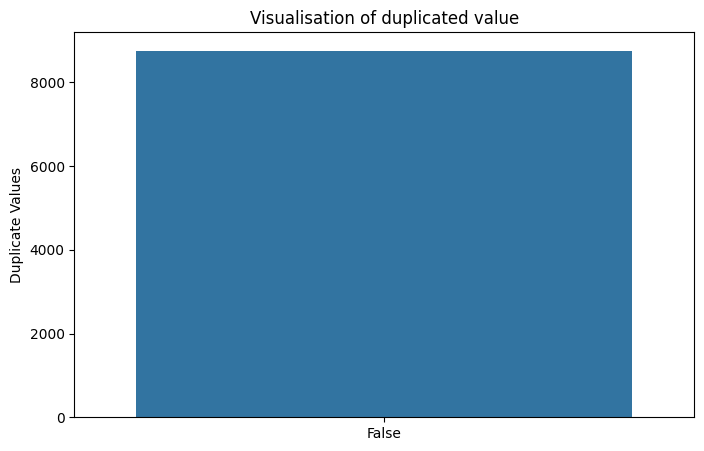

In [17]:
# Visualizing the duplicate values
plt.figure(figsize=(8,5))
#assigning the fig size to this countplot
#For better Well-structured and code formatted we will use (8,5) fig size to evry chart

sns.countplot(x=seol_bike_df.duplicated())
plt.title('Visualisation of duplicated value')
plt.ylabel('Duplicate Values')
plt.show()

### What did you know about your dataset?




1.   #### There are a total of 14 feature columns where Rented_Bike_Count is the dependent variable column.
2.   #### The total number of observations(rows) are 8760.
3. #### There are no duplicate rows in the dataset.
4. #### Also there are no missing values or Null values in the dataset.
5. #### Date- columns need to convert into proper data type.
6. #### Columns to convert into numeric(for modelling Purpose)
seasons
holiday
functioning day











## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
# Checking all the columns name
seol_bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [19]:
# Dataset Describe
seol_bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


<b>Attribute Information: </b>

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of the day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
seol_bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Before doing any data wrangling lets create copy of the dataset
data= seol_bike_df.copy()

In [22]:
# We can see that the Date variable is in object datatype, we need to change it into datetime datatype
data['Date'] = data['Date'].astype(np.datetime64)

data['month'] = data['Date'].dt.month

data['day'] = data['Date'].dt.day_name()

In [23]:
# Dropping Date variable from dataset
data.drop(['Date'],axis = 1, inplace = True)

In [24]:
# Defining separate data as numerical and categorical data.
# Numerical data

numerical_data = list(set(data.describe().columns.tolist()) - {'Hour','month'})

# Categorical data

categorical_data = list(set(data.columns)-set(numerical_data))

#dependent variable Data
dependent_variable = ['Rented Bike Count']


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [26]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday


### What all manipulations have you done and insights you found?

1) Changed Date column datatype from object to Datetime data type.

2) Created new columns Day and Month from date column and dropped Date.

3) Defining separate data as numerical and categorical data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
## Visualizing data distribution of Dependent variable (Rented Bike Count)

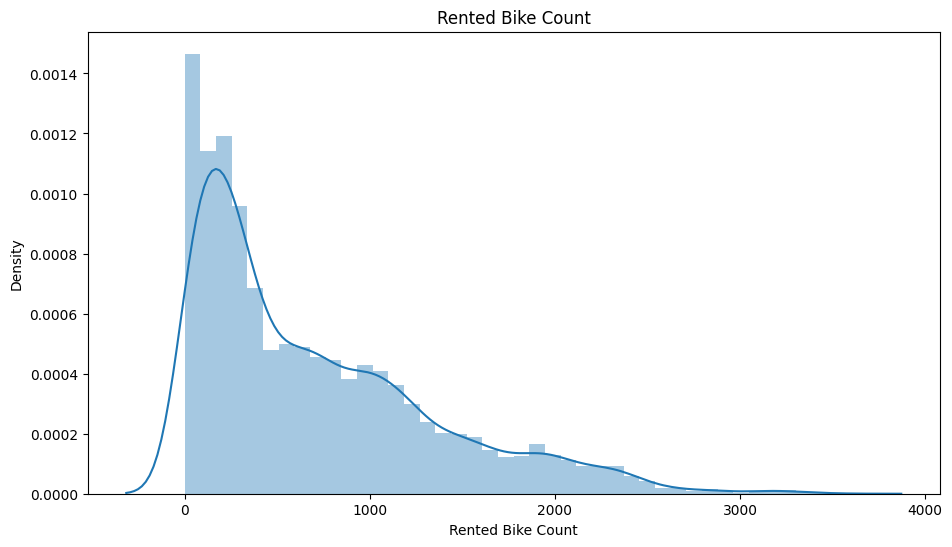

In [27]:
# Chart - 1 visualization code
# Chart - 1 visualization code

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(11,6))
plt.title('Rented Bike Count')
sns.distplot(data['Rented Bike Count'] )
plt.show()

##### 1. Why did you pick the specific chart?

**Distplot is one of the best charts to show the data distribution.**

##### 2. What is/are the insight(s) found from the chart?

**From above distribution plot of dependent variable rented bike, we can clearly see that the distribution is positively skewed (Right skewed).It means that distribution is not symmetric around the the mean.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, definately from this insight we got to know that our data is not normally distributed so, before doing or implementing any model on this data we need to normalise this data.**

#### Chart - 2
## Visualizing data distribution of categorical data with respect to Rented Bike Count.

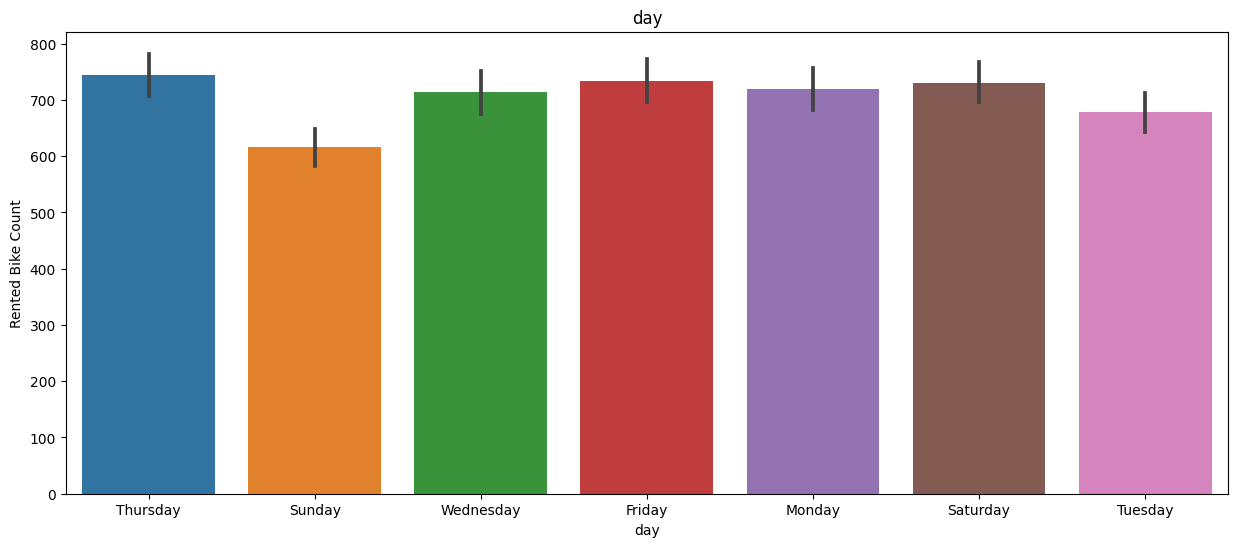

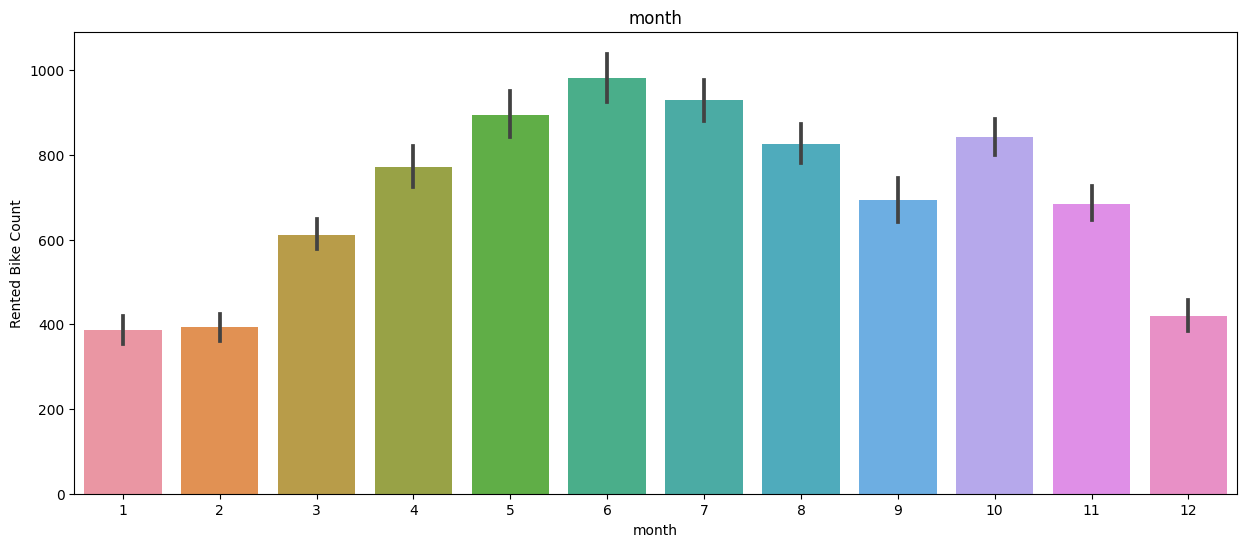

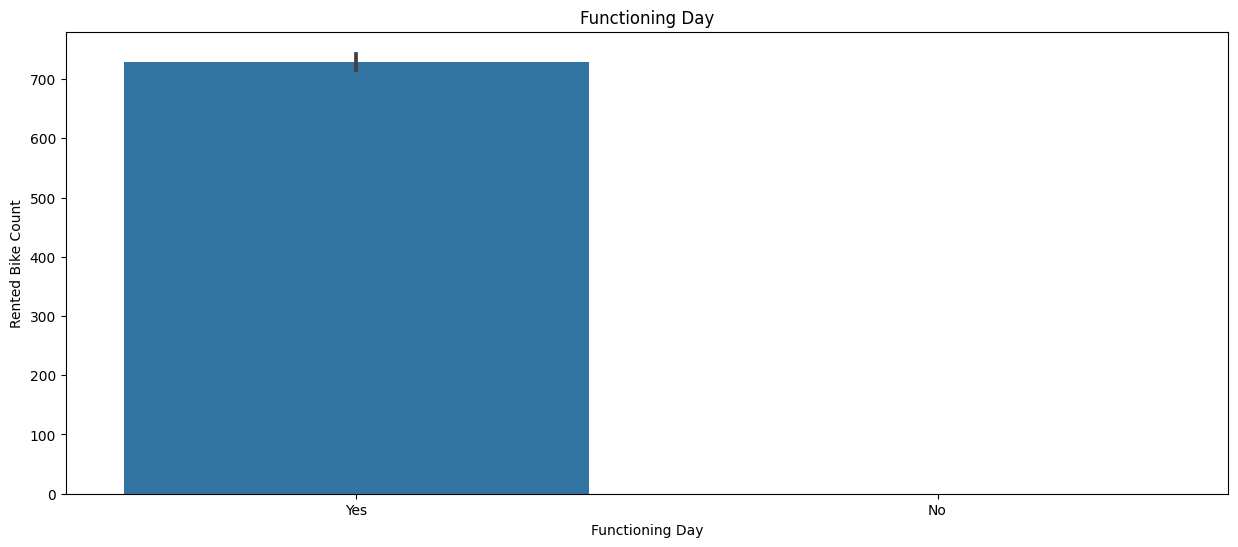

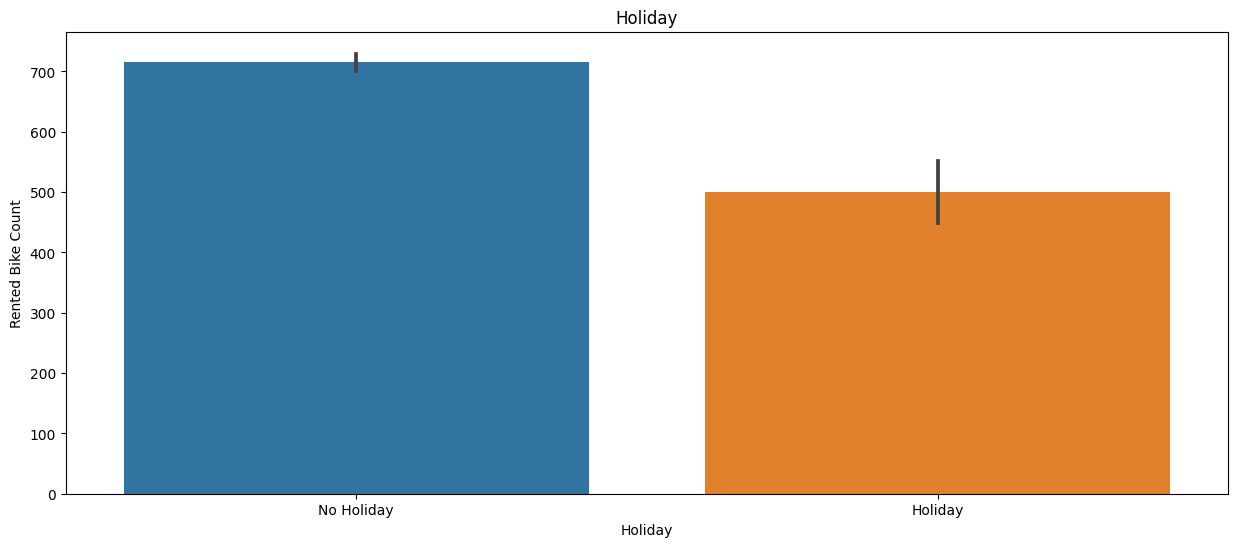

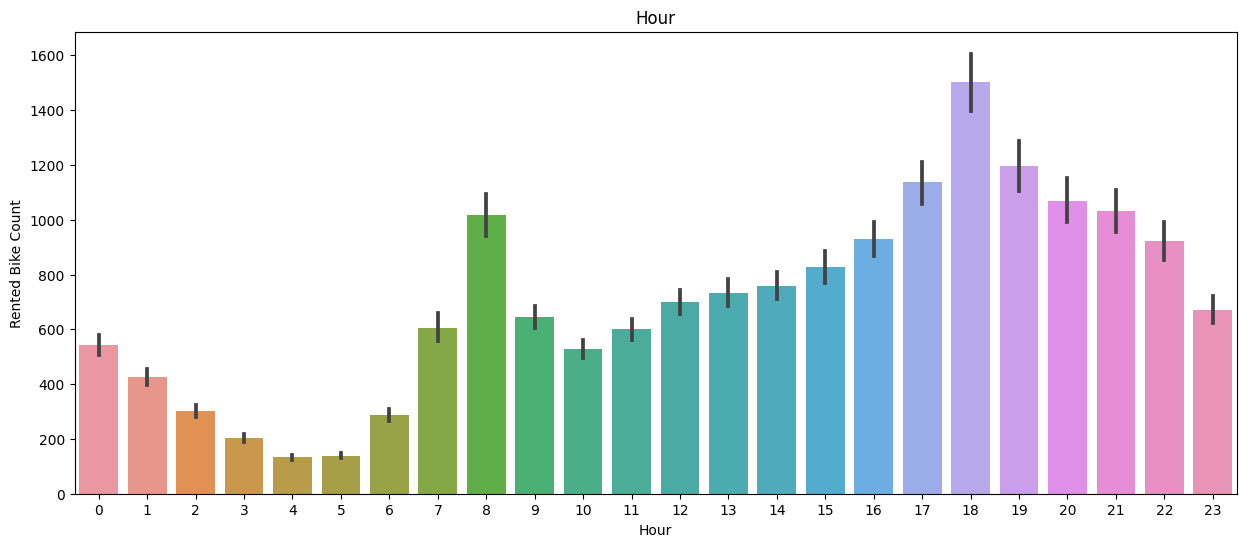

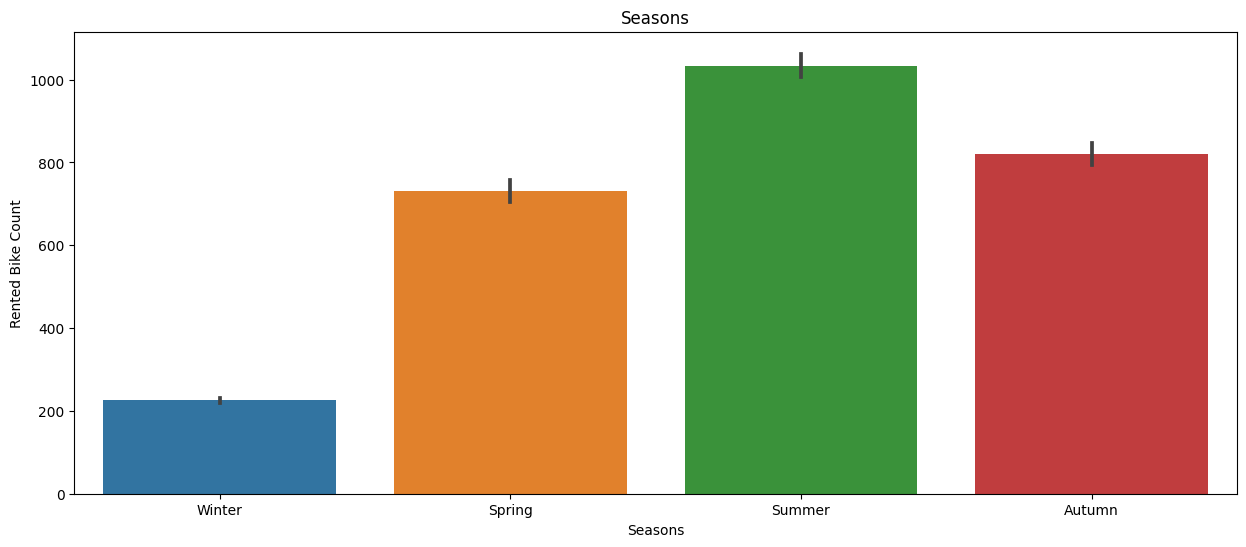

In [28]:
# Chart - 2 visualization code

# Creating a for loop for visualizing all the categorical data with respect to Rented Bike Count.

for i in categorical_data:
    plt.figure(figsize=(15,6))
    plt.title(i)
    sns.barplot(x = data[i], y = data['Rented Bike Count'])
    plt.show()

##### 1. Why did you pick the specific chart?

**To visualise and spread categorical data with respect to Rented Bike Count.**

##### 2. What is/are the insight(s) found from the chart?

1) The peak hours of rented bikes is 5:00PM - 7:00PM and the least bikes are rented between 3:00AM to 5:00AM.

2) June is the peak and January is the bottom months for number of rented bikes.

3) Highest no. of bikes are booked on Thursday and the least on Sunday.

4) People prefer renting bikes most in the Summer season and the least in winter season.

5) People rented more bikes on a non-holiday compared to a holiday.

6) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The above gained insights can definitely help creating a positive business impact, we got to know how time, month, day, season and holiday impact the number of rented bikes, we can make strategies accordingly.**


#### Chart - 3
##Bike Rent Count trend with respect to Hours on Months.(Multivariate analysis)


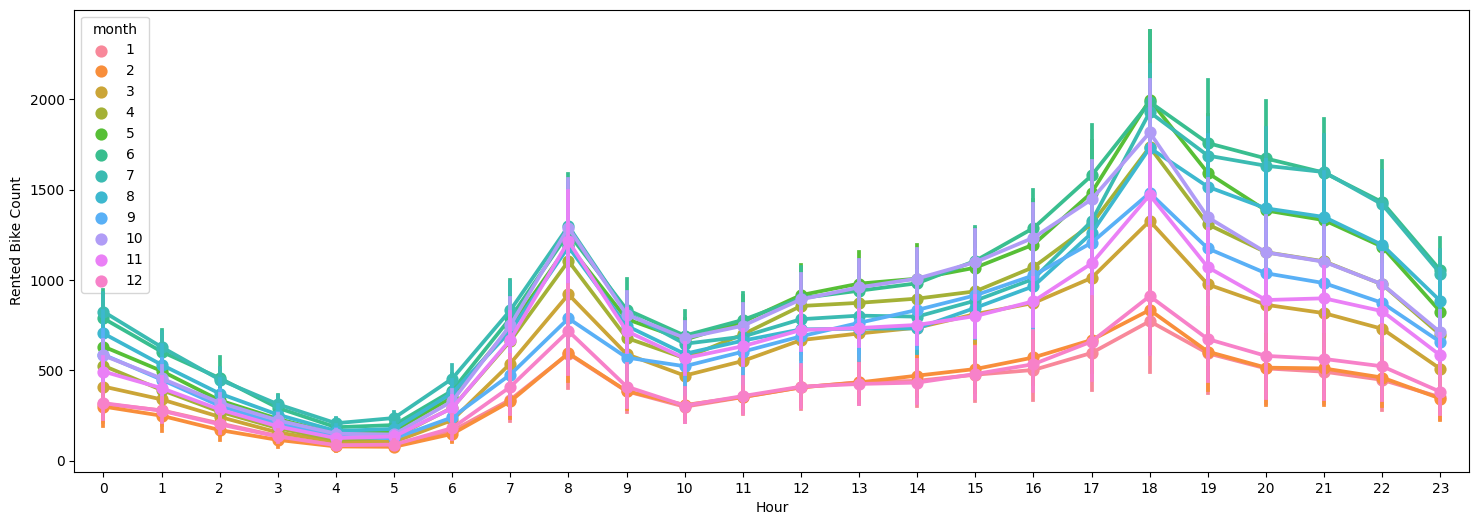

In [29]:
# Chart - 3 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,6))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['month'])
plt.show()

##### 1. Why did you pick the specific chart?

**To do a multivariate analysis among Hour, Rented Bike Count and Month**

##### 2. What is/are the insight(s) found from the chart?

**June is the peak and January is the bottom months for number of rented bikes.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The above gained insights can definitely help creating a positive business impact, we got to know how month impact the number of rented bikes, we can make strategies accordingly.**

#### Chart - 4
## Bike Rent Count trend with respect Hours on Days. (multivariate)

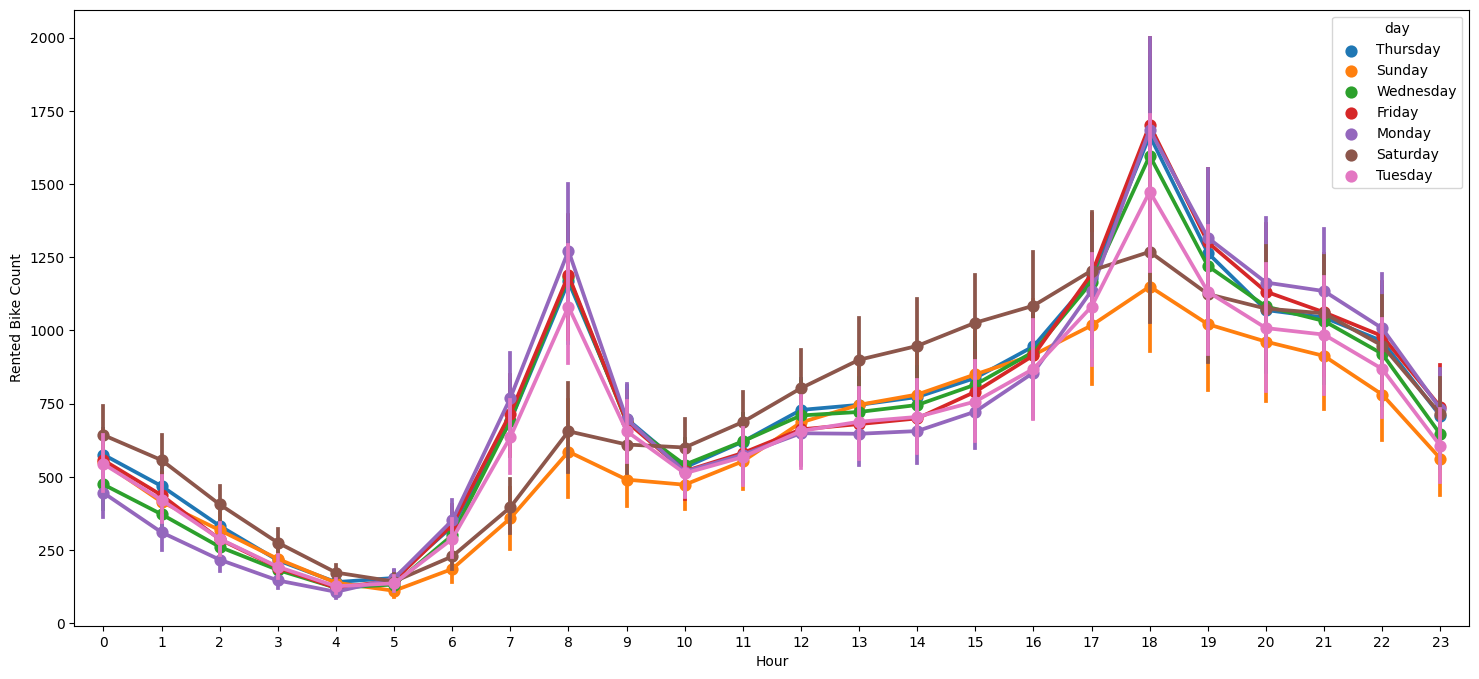

In [30]:
# Chart - 4 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['day'])
plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Day.

##### 2. What is/are the insight(s) found from the chart?

Highest no. of bikes are booked on Thursday and the least on Sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Days impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 5
## Rented Bike Count vs Hour

Text(0.5, 1.0, 'Average bike rented per hour')

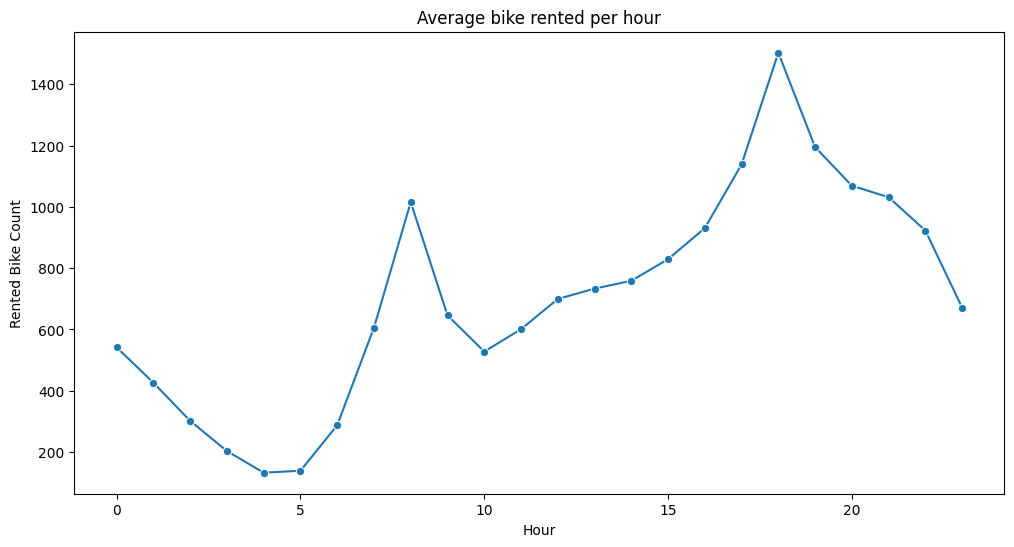

In [31]:
# Chart - 5 visualization code

#ploting line graph
#group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data.groupby('Hour')['Rented Bike Count'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.title('Average bike rented per hour')

##### 1. Why did you pick the specific chart?

To see how rented bike demand is distributed over 24 hours time we used line plot.

##### 2. What is/are the insight(s) found from the chart?

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high demand in morning and evening so business needs to focus more on that time slot. as well as try to meet the demand on that time slot.

#### Chart - 6
## Bike Rent Count trend with respect Hours on Seasons.(Multivariate analysis.)

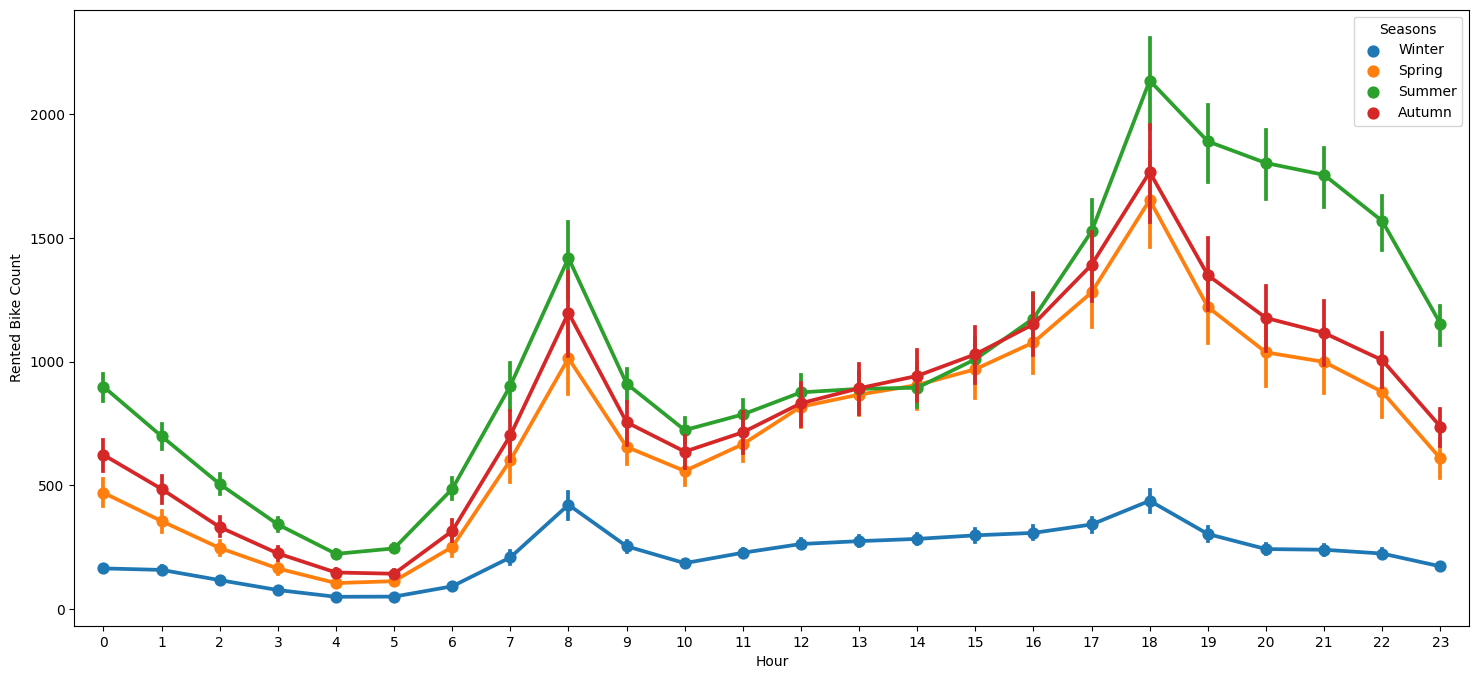

In [32]:
# Chart - 6 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['Seasons'])
plt.show()

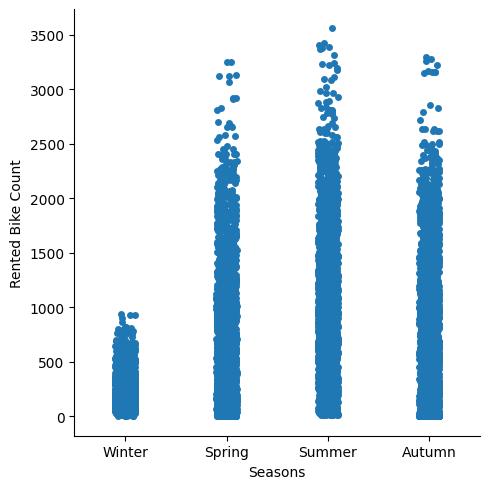

In [81]:
#plot for rented bike count seasonly

sns.catplot(x='Seasons',y='Rented Bike Count',data=data)

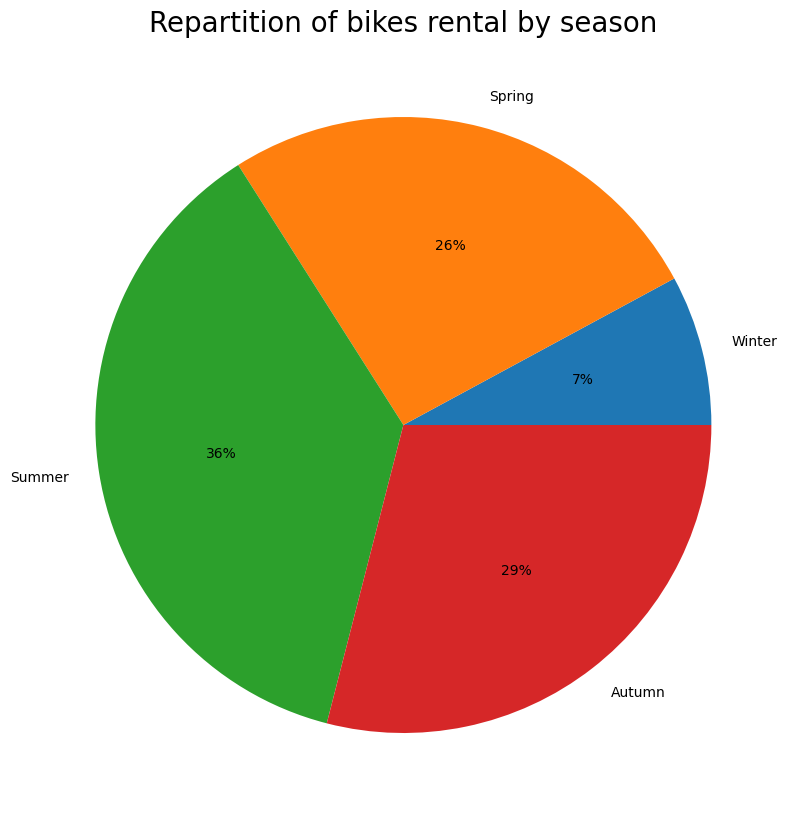

In [78]:
Winter=data[data["Seasons"]=='Winter'].sum()
Spring=data[data["Seasons"]=='Spring'].sum()
Summer=data[data["Seasons"]=='Summer'].sum()
Autumn=data[data["Seasons"]=='Autumn'].sum()

BikeSeasons={"Winter":Winter["Rented Bike Count"],"Spring":Spring["Rented Bike Count"],"Summer":Summer["Rented Bike Count"],"Autumn":Autumn["Rented Bike Count"]}
plt.gcf().set_size_inches(10,10)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Months

##### 2. What is/are the insight(s) found from the chart?

People prefer renting bikes most in the Summer season and the least in winter season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Seasons impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 7
## Bike Rent Count trend with respect Hours on Days.(Multivariate analysis)

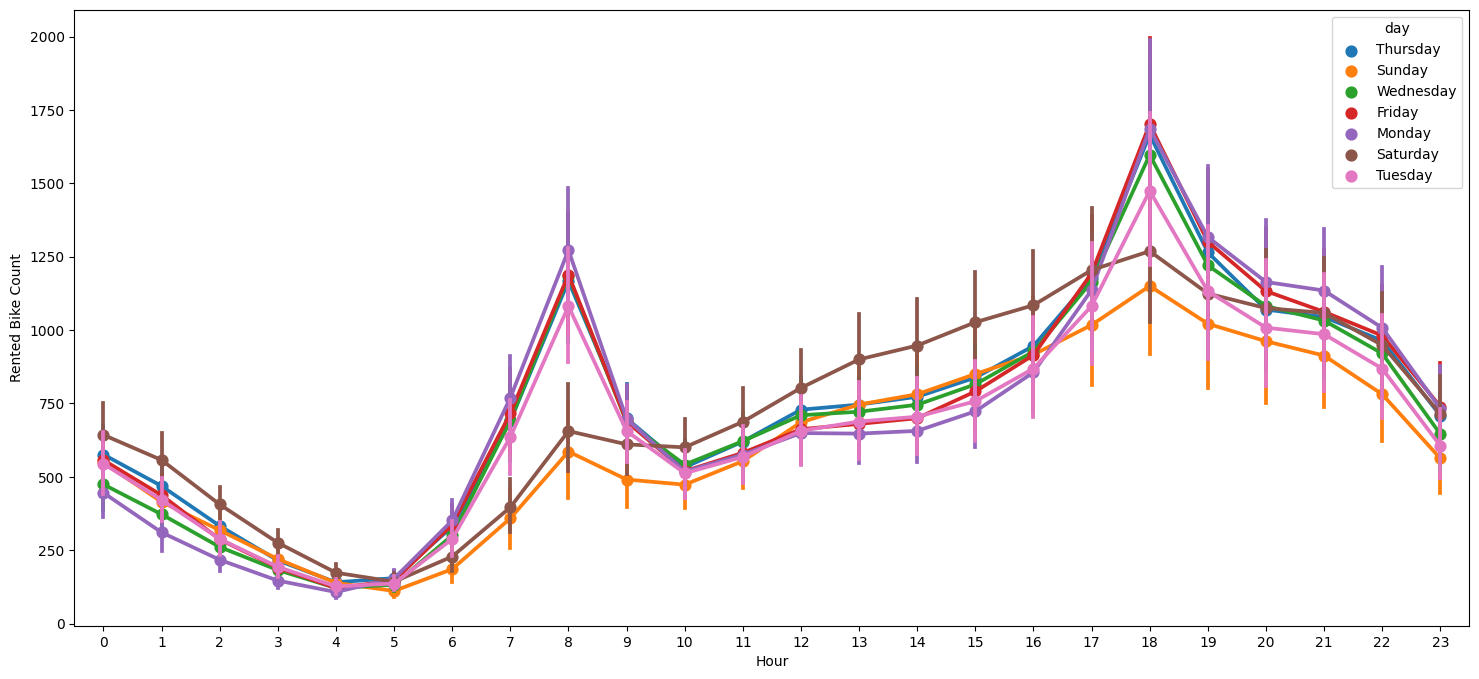

In [33]:
# Chart - 7 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['day'])
plt.show()

##### 1. Why did you pick the specific chart?

**To do a multivariate analysis among Hour, Rented Bike Count and Day.**

##### 2. What is/are the insight(s) found from the chart?

**Highest no. of bikes are booked on Thursday and the least on Sunday.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The above gained insights can definitely help creating a positive business impact, we got to know how Days impact the number of rented bikes, we can make strategies accordingly.**

#### Chart - 8
## Bike Rent Count trend with respect Hours on Holidays.(multivariate analysis.)


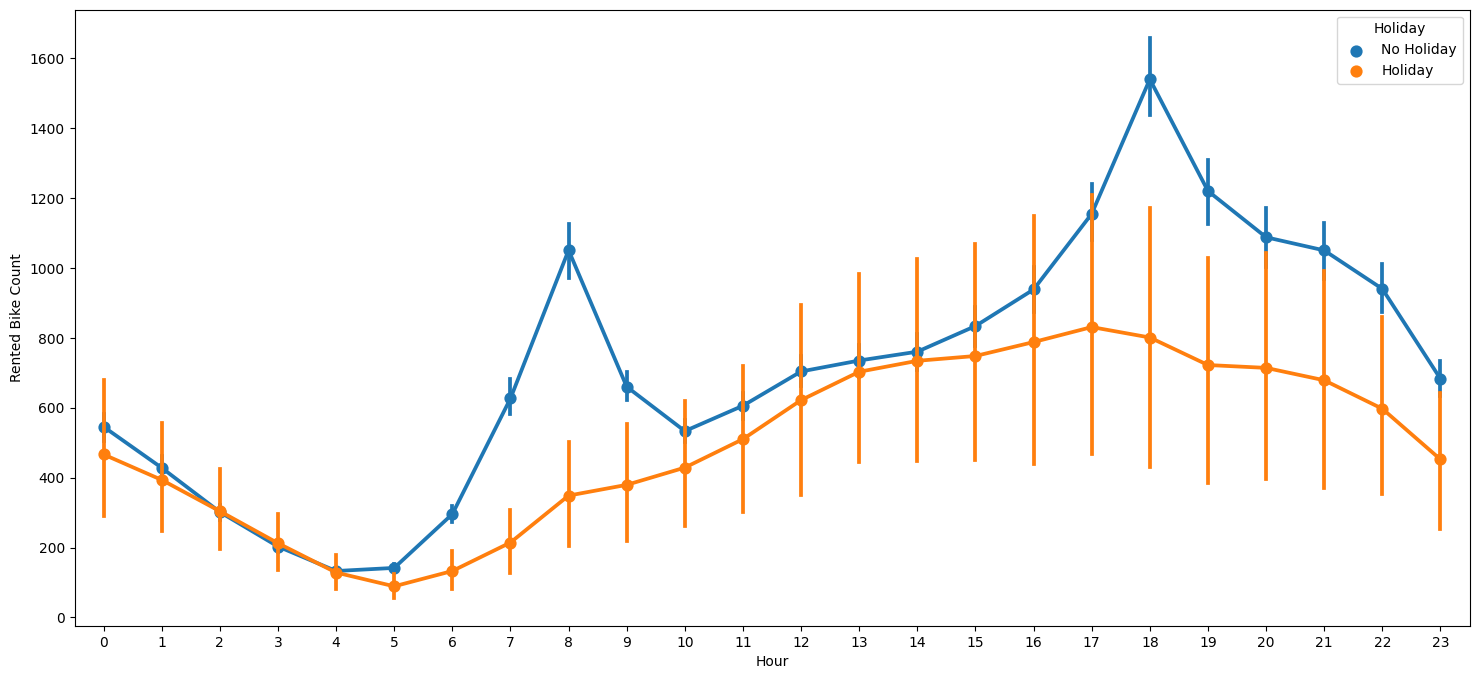

In [34]:
# Chart - 8 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['Holiday'])

plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Holiday.

##### 2. What is/are the insight(s) found from the chart?

People rented more bikes on a non-holiday compared to a holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Holidays impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 9
## Categorical plot for seasons

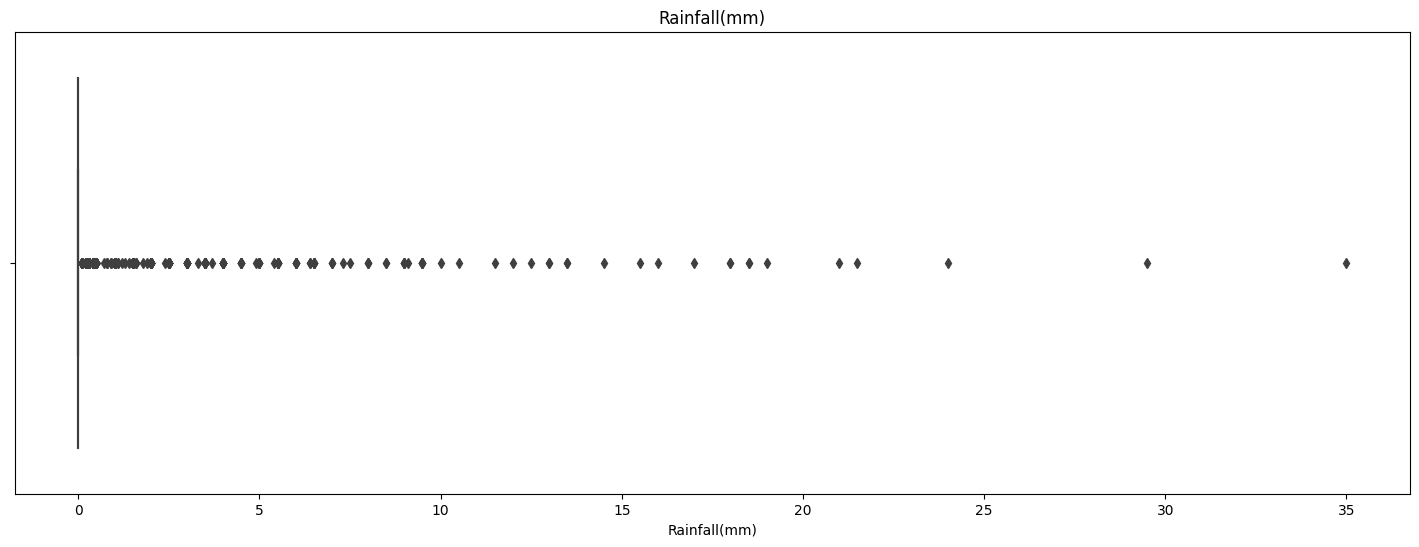

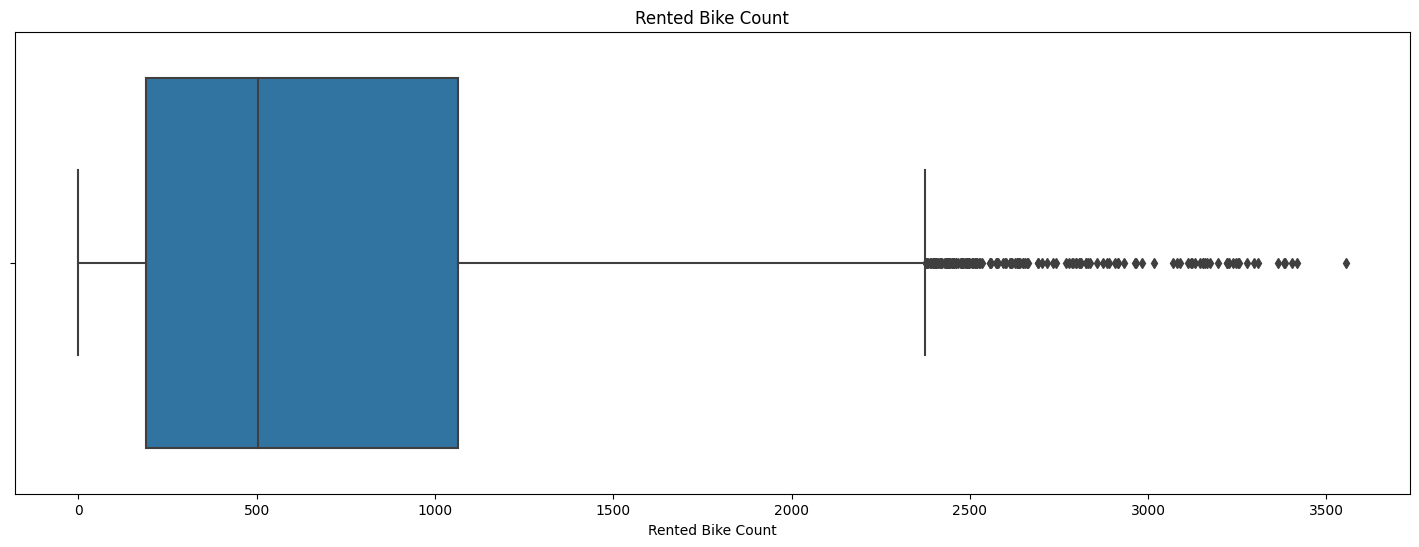

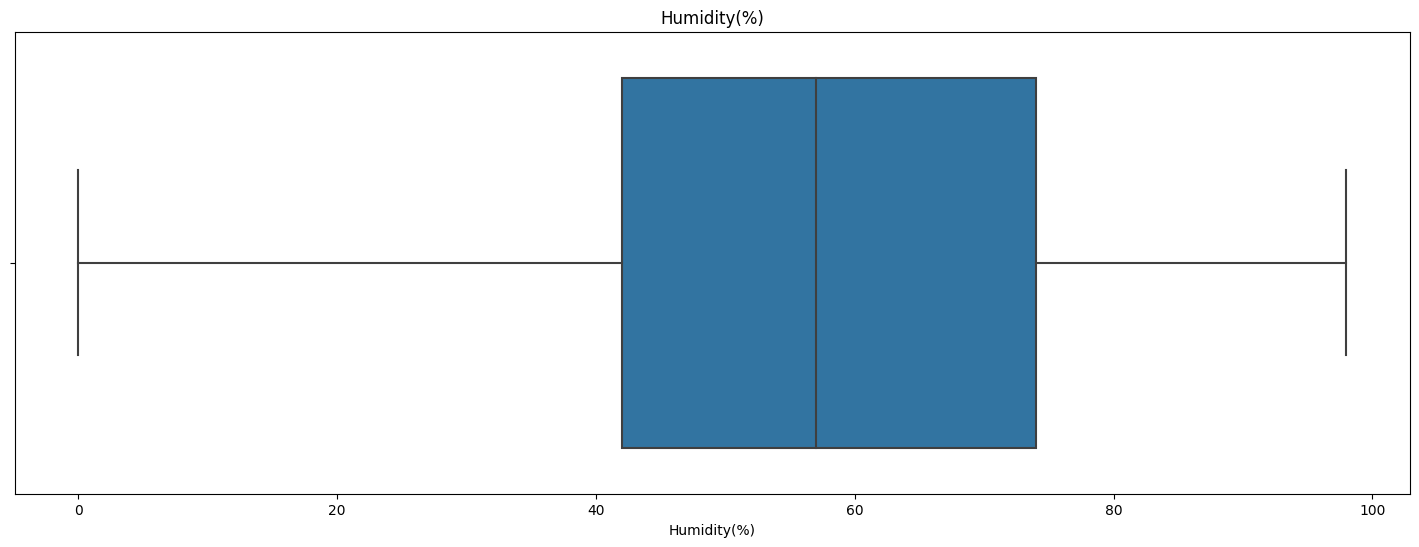

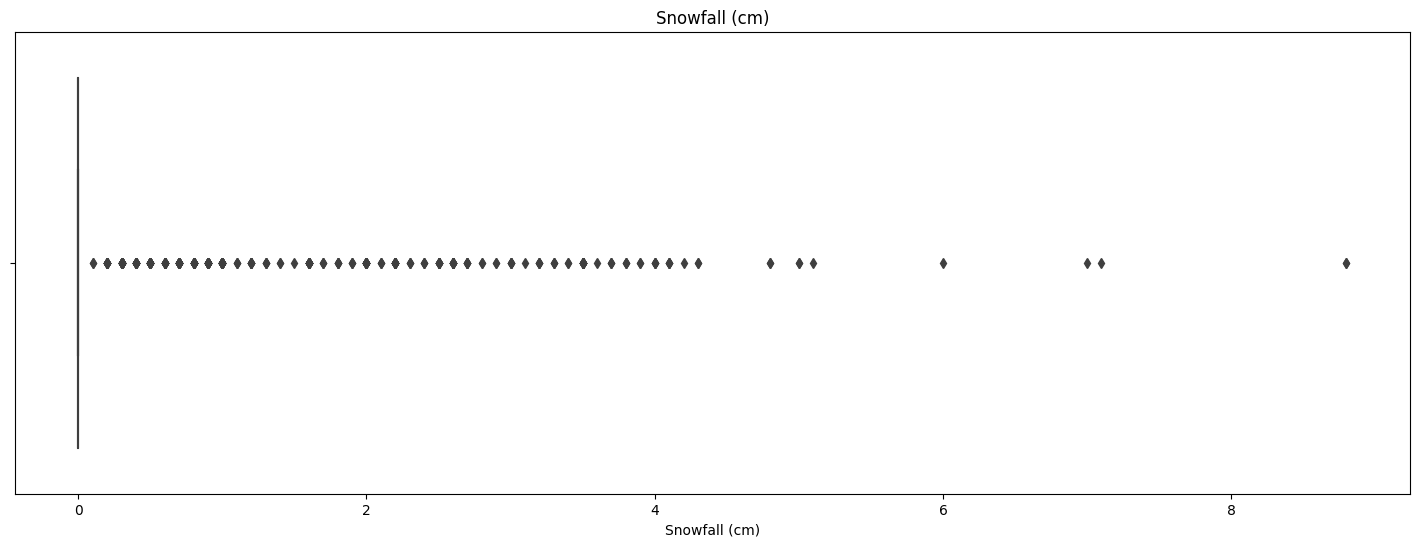

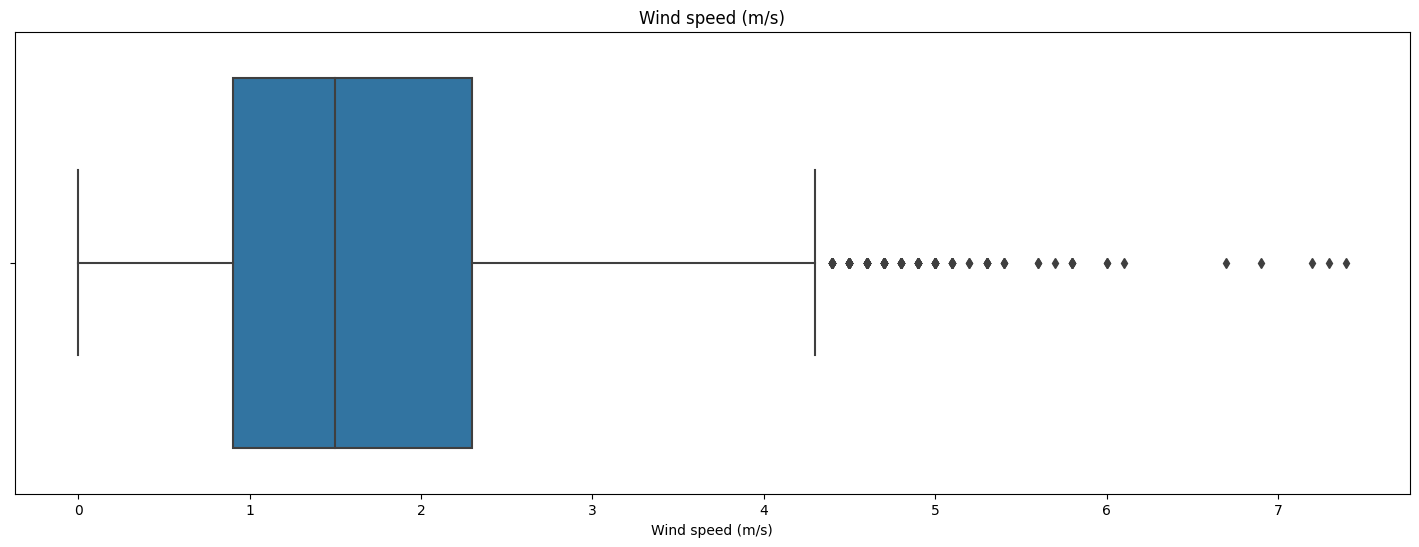

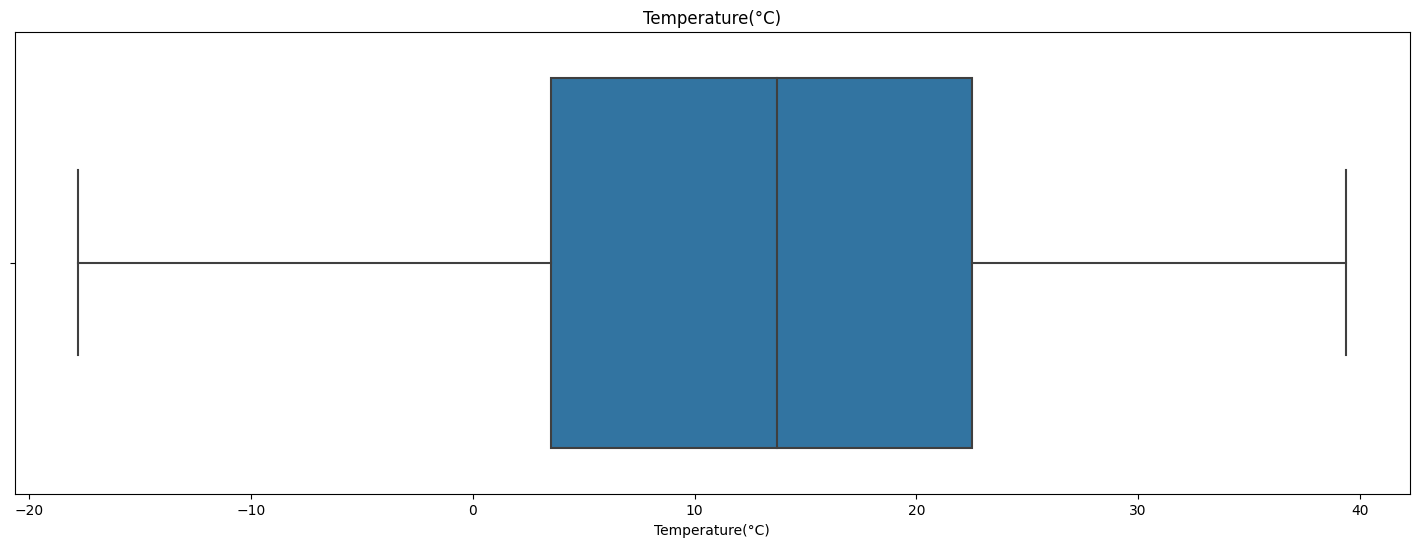

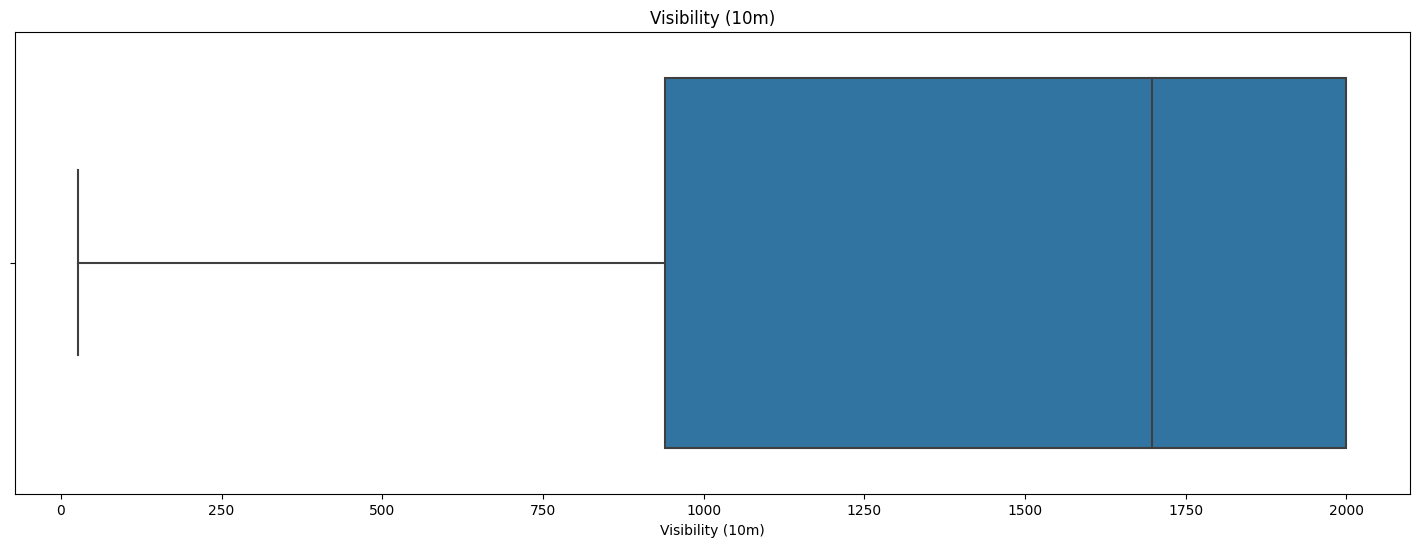

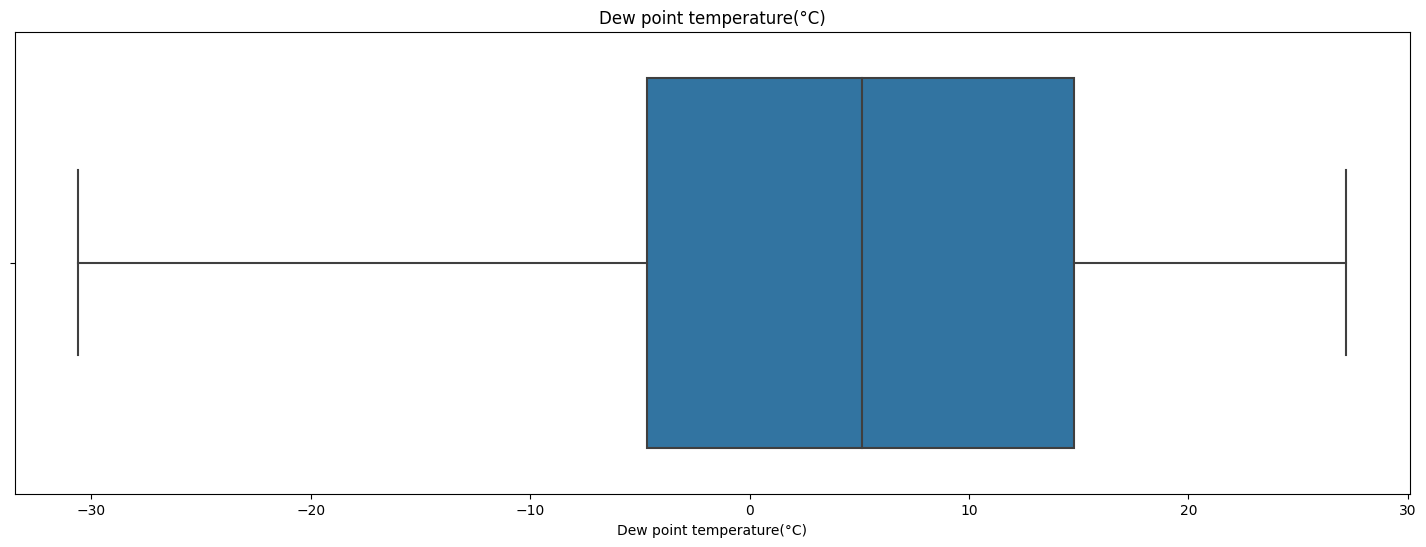

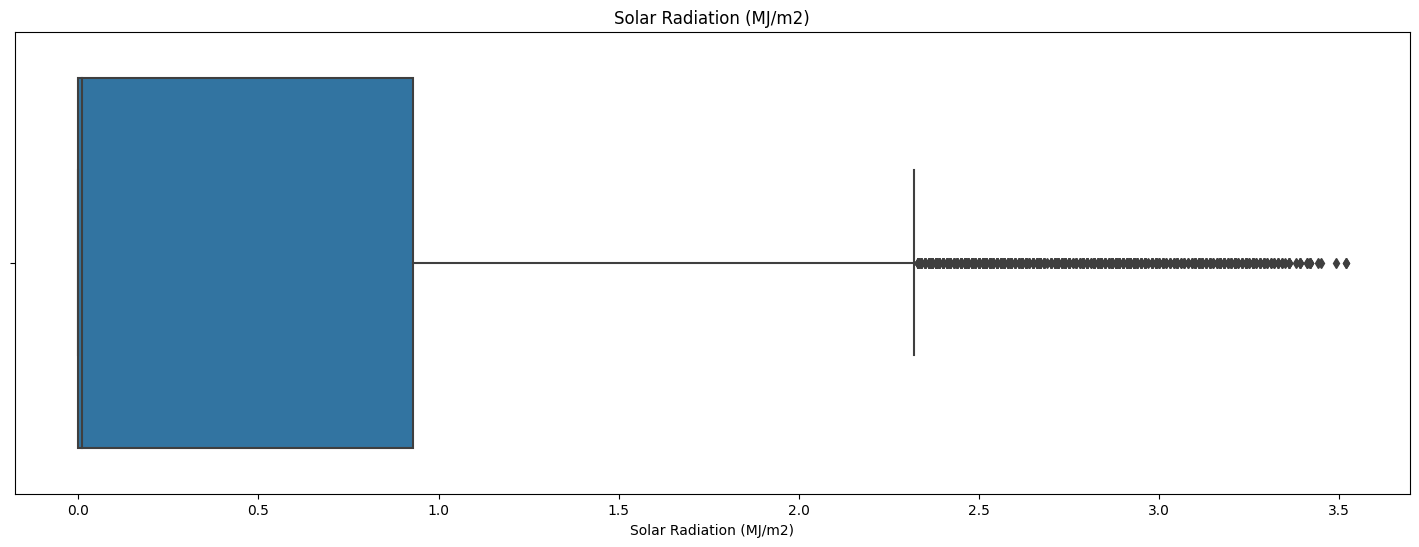

In [82]:
# Chart - 9 visualization code

# Writing code for creating a for loop for numerical variables and creting box plots.

for i in numerical_data:
  plt.figure(figsize = (18,6))
  sns.boxplot(x = data[i])
  plt.title(i)
  plt.show()

##### 1. Why did you pick the specific chart?

**To see the distribution of the rented bike on basis of season column we used catplot.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [36]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [37]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [38]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [39]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [40]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [41]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [61]:
# Transform Your data

### 6. Data Scaling

In [62]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [63]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [65]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [71]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***